***1. Phân tích dữ liệu khám phá (Exploratory Data Analysis - EDA) bằng pandas_profiling*** 

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import train_test_split
# Đọc file CSV
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Tạo bản sao
df_processed = df.copy()


In [2]:
from pandas_profiling import ProfileReport

# Tạo báo cáo pandas-profiling
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Lưu báo cáo dưới dạng HTML
profile.to_file("customer_churn_eda_report.html")

print("Báo cáo EDA đã được tạo và lưu dưới tên 'customer_churn_eda_report.html'")




C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  """Entry point for launching an IPython kernel.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Báo cáo EDA đã được tạo và lưu dưới tên 'customer_churn_eda_report.html'




**1. customerID** 
- **Vấn đề**: Có tính unique cao (7043 giá trị khác nhau)
- **Xử lý**: Loại bỏ 

**2. gender** 
- **Vấn đề**: Không 
- **Xử lý**: Mã hóa nhị phân (Label encoding)

**3. SeniorCitizen** 
- **Vấn đề**: Đã được mã hóa dưới dạng 0 và 1
- **Xử lý**: Không cần xử lý 

**4. Partner và Dependents** 
- **Vấn đề**: Biến phân loại nhị phân
- **Xử lý**: Mã hóa nhị phân (Label encoding)

**5. tenure** 
- **Vấn đề**: Có phân phối không chuẩn
- **Xử lý**: 
  - Chuẩn hóa bằng Min-Max scaling
  - Tạo thêm cột nhóm tenure

**6. PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies** 
- **Vấn đề**: Biến phân loại có nhiều giá trị
- **Xử lý**: 
  - One-hot encoding
  - Gộp các dịch vụ

**7. Contract** 
- **Vấn đề**: Biến phân loại có thứ tự
- **Xử lý**: Mã hóa thứ tự (Ordinal encoding)

**8. PaperlessBilling** 
- **Vấn đề**: Biến nhị phân
- **Xử lý**: Mã hóa nhị phân (Label encoding)

**9. PaymentMethod** 
- **Vấn đề**: Biến phân loại
- **Xử lý**: One-hot encoding

**10. MonthlyCharges và TotalCharges** 
- **Vấn đề**: 
  - Biến số liên tục
  - Xử lý giá trị ngoại lai
  - TotalCharges có thể có giá trị thiếu
- **Xử lý**: 
  - Xử lý giá trị ngoại lai (nếu có)
  - Điền giá trị thiếu cho TotalCharges 
  - Chuẩn hóa bằng Min-Max Scaling

**11. Churn (Biến mục tiêu)** 
- **Vấn đề**: Biến nhị phân, Mất cân bằng
- **Xử lý**: 
  - Mã hóa nhị phân (Label encoding: No=0, Yes=1)
  - Cân bằng lớp sử dụng SMOTE

**Các bước xử lý bổ sung:**

1. **Kiểm tra và xử lý giá trị thiếu**: Mặc dù báo cáo không chỉ ra giá trị thiếu, vẫn nên kiểm tra kỹ lưỡng.

2. **Xử lý giá trị ngoại lai**: Đặc biệt cho các biến số như MonthlyCharges và TotalCharges.

3. **Feature Engineering**: 
   - Tạo các tính năng mới như tỷ lệ TotalCharges/tenure
   - Gộp các dịch vụ internet thành một tính năng tổng hợp

4. **Kiểm tra đa cộng tuyến**: Loại bỏ hoặc gộp các biến có tương quan cao.

5. **Cân bằng lớp**: Áp dụng kỹ thuật như SMOTE nếu lớp Churn không cân bằng.

6. **Chia dữ liệu**: Tách thành tập huấn luyện và tập kiểm tra trước khi đưa vào mô hình AutoML.

Sau khi thực hiện các bước xử lý này, dữ liệu sẽ sẵn sàng để đưa vào các công cụ AutoML để dự đoán Customer Churn.


***2. Pre-process tập data. Chia tập dữ liệu thành 2 tập con train/test theo tỉ lệ 8:2*** 

**1. customerID** 
- **Vấn đề**: Có tính unique cao (7043 giá trị khác nhau)
- **Xử lý**: Loại bỏ 

In [2]:
df_processed = df_processed.drop('customerID', axis=1)

**2. gender** 
- **Vấn đề**: Không 
- **Xử lý**: Mã hóa nhị phân (Label encoding)

In [3]:
le = LabelEncoder()
df_processed['gender'] = le.fit_transform(df_processed['gender'])

**4. Partner và Dependents** 
- **Vấn đề**: Biến phân loại nhị phân
- **Xử lý**: Mã hóa nhị phân (Label encoding)

In [4]:
df_processed['Partner'] = le.fit_transform(df_processed['Partner'])
df_processed['Dependents'] = le.fit_transform(df_processed['Dependents'])

**5. tenure** 
- **Vấn đề**: Có phân phối không chuẩn
- **Xử lý**: 
  - Chuẩn hóa bằng Min-Max scaling
  - Tạo thêm cột nhóm tenure

In [5]:

scaler = MinMaxScaler()
df_processed['tenure_scaled'] = scaler.fit_transform(df_processed[['tenure']])
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, np.inf], labels=['0-1 year', '1-2 years', '2-3 years', '3+ years'])

**6. PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies** 
- **Vấn đề**: Biến phân loại có nhiều giá trị
- **Xử lý**: 
  - One-hot encoding
  - Gộp các dịch vụ

In [6]:
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# One-hot encoding
df_services = pd.get_dummies(df[service_cols], drop_first=True)

# Tạo biến tổng hợp
df['TotalServices'] = df[service_cols].apply(lambda x: x.str.count('Yes')).sum(axis=1)

**7. Contract** 
- **Vấn đề**: Biến phân loại có thứ tự
- **Xử lý**: Mã hóa thứ tự (Ordinal encoding)

In [7]:
oe = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
df_processed['Contract_encoded'] = oe.fit_transform(df_processed[['Contract']])



**8. PaperlessBilling** 
- **Vấn đề**: Biến nhị phân
- **Xử lý**: Mã hóa nhị phân (Label encoding)

In [8]:
df_processed['PaperlessBilling'] = le.fit_transform(df_processed['PaperlessBilling'])

**9. PaymentMethod** 
- **Vấn đề**: Biến phân loại
- **Xử lý**: One-hot encoding

In [9]:
df_payment = pd.get_dummies(df_processed['PaymentMethod'], prefix='Payment', drop_first=True)


**10. MonthlyCharges và TotalCharges** 
- **Vấn đề**: 
  - Biến số liên tục
  - Xử lý giá trị ngoại lai
  - TotalCharges có thể có giá trị thiếu
- **Xử lý**: 
  - Xử lý giá trị ngoại lai (nếu có)
  - Điền giá trị thiếu cho TotalCharges 
  - Chuẩn hóa bằng Min-Max Scaling

In [10]:
# Xử lý giá trị thiếu trong TotalCharges
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
imputer = SimpleImputer(strategy='mean')
df_processed['TotalCharges'] = imputer.fit_transform(df_processed[['TotalCharges']])

# Xử lý giá trị ngoại lai bằng phương pháp IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), 
                          df[column].median(), 
                          df[column])
    return df

df_processed = remove_outliers(df_processed, 'MonthlyCharges')
df_processed = remove_outliers(df_processed, 'TotalCharges')

# Kiểm tra và điều chỉnh mối quan hệ giữa TotalCharges và tenure
df_processed['ExpectedTotal'] = df_processed['MonthlyCharges'] * df_processed['tenure']
df_processed.loc[df_processed['TotalCharges'] < df_processed['ExpectedTotal'], 'TotalCharges'] = df_processed['ExpectedTotal']

# Chuẩn hóa
scaler = MinMaxScaler()
df_processed['MonthlyCharges_scaled'] = scaler.fit_transform(df_processed[['MonthlyCharges']])
df_processed['TotalCharges_scaled'] = scaler.fit_transform(df_processed[['TotalCharges']])

# Tạo biến mới, xử lý trường hợp tenure = 0
df_processed['AvgMonthlyCharges'] = np.where(df_processed['tenure'] != 0, 
                                             df_processed['TotalCharges'] / df_processed['tenure'], 
                                             df_processed['MonthlyCharges'])

# Thêm biến mới: Tỷ lệ giữa TotalCharges và MonthlyCharges
df_processed['ChargesRatio'] = df_processed['TotalCharges'] / df_processed['MonthlyCharges']

# Kiểm tra phân phối và áp dụng log transformation nếu cần
if stats.skew(df_processed['MonthlyCharges']) > 1:
    df_processed['MonthlyCharges_log'] = np.log1p(df_processed['MonthlyCharges'])
if stats.skew(df_processed['TotalCharges']) > 1:
    df_processed['TotalCharges_log'] = np.log1p(df_processed['TotalCharges'])


**11. Churn (Biến mục tiêu)** 
- **Vấn đề**: Biến nhị phân, Mất cân bằng
- **Xử lý**: 
  - Mã hóa nhị phân (Label encoding: No=0, Yes=1)
  - Cân bằng lớp sử dụng SMOTE

In [11]:
# Xử lý các cột categorical
le = LabelEncoder()
categorical_columns = df_processed.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))

# Xử lý TotalCharges
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
df_processed['TotalCharges'].fillna(df_processed['TotalCharges'].mean(), inplace=True)


In [12]:
# Kiểm tra đa cộng tuyến bằng VIF
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i)
                       for i in range(len(features))]
    return vif_data

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
vif = calculate_vif(df_processed, numeric_cols)
print("VIF values:")
print(vif)

# Loại bỏ các biến có VIF > 10 (ngưỡng này có thể điều chỉnh)
high_vif_features = vif[vif["VIF"] > 10]["feature"].tolist()
df_processed = df_processed.drop(high_vif_features, axis=1)

# Feature selection sử dụng Random Forest
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe = rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected features:")
print(selected_features)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cân bằng lớp sử dụng SMOTE (chỉ áp dụng cho tập huấn luyện)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Shape before SMOTE:", X_train.shape)
print("Shape after SMOTE:", X_train_resampled.shape)

# Lưu dữ liệu đã xử lý
df_final = pd.DataFrame(X_train_resampled, columns=selected_features)
df_final['Churn'] = y_train_resampled
df_final.to_csv('processed_telco_churn_data.csv', index=False)

print("Dữ liệu đã xử lý được lưu vào file 'processed_telco_churn_data.csv'")


VIF values:
          feature       VIF
0          tenure  6.354525
1  MonthlyCharges  3.377304
2    TotalCharges  8.164580
Selected features:
Index(['Contract', 'MonthlyCharges', 'TotalCharges', 'tenure_scaled',
       'Contract_encoded', 'ExpectedTotal', 'MonthlyCharges_scaled',
       'TotalCharges_scaled', 'AvgMonthlyCharges', 'ChargesRatio'],
      dtype='object')
Shape before SMOTE: (5634, 10)
Shape after SMOTE: (8276, 10)
Dữ liệu đã xử lý được lưu vào file 'processed_telco_churn_data.csv'


**Chia tập dữ liệu thành 2 tập con train/test theo tỉ lệ 8:2**


In [13]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***3. Tìm mô hình tốt nhất trên tập train, theo tiêu chí F1 Score, 5-fold cross validation. Tuning mô hình vừa tìm.*** 

In [14]:
from pycaret.classification import *


# Sử dụng dữ liệu đã được xử lý
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kết hợp X_train và y_train thành một DataFrame
df_train = pd.concat([X_train, y_train], axis=1)

# Thiết lập môi trường PyCaret
clf = setup(data=df_train, target='Churn', session_id=42, fold=5, use_gpu=True, silent=True)

# So sánh tất cả các mô hình
best_model = compare_models(sort='F1')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7764,0.8553,0.8311,0.7510,0.7888,0.5525,0.5562,2.3560
et,Extra Trees Classifier,0.7790,0.8505,0.7924,0.7735,0.7827,0.5579,0.5583,0.8020
rf,Random Forest Classifier,0.7768,0.8571,0.7894,0.7720,0.7804,0.5536,0.5541,0.9100
knn,K Neighbors Classifier,0.7626,0.8290,0.8247,0.7349,0.7771,0.5249,0.5291,0.2540
gbc,Gradient Boosting Classifier,0.7619,0.8407,0.8199,0.7363,0.7757,0.5236,0.5273,0.3480
lr,Logistic Regression,0.7494,0.8211,0.8350,0.7144,0.7700,0.4984,0.5059,0.0320
ada,Ada Boost Classifier,0.7537,0.8319,0.8096,0.7297,0.7676,0.5072,0.5103,0.1360
ridge,Ridge Classifier,0.7453,0.0000,0.8182,0.7157,0.7635,0.4903,0.4956,0.0100
lda,Linear Discriminant Analysis,0.7449,0.8179,0.8174,0.7155,0.7630,0.4894,0.4947,0.0100
svm,SVM - Linear Kernel,0.7384,0.0000,0.8362,0.7010,0.7624,0.4763,0.4861,0.0140


In [15]:
# Tuning mô hình
tuned_model = tune_model(best_model)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7799,0.8630,0.7935,0.7736,0.7834,0.5598,0.5600
1,0.7767,0.8360,0.8197,0.7564,0.7868,0.5532,0.5552
2,0.7659,0.8456,0.7747,0.7632,0.7689,0.5318,0.5318
3,0.7808,0.8714,0.8043,0.7695,0.7865,0.5615,0.5620
4,0.7754,0.8493,0.8086,0.7596,0.7833,0.5506,0.5518
Mean,0.7757,0.8531,0.8002,0.7645,0.7818,0.5514,0.5522
Std,0.0053,0.0126,0.0153,0.0063,0.0066,0.0106,0.0108


***4. Vẽ confusion_matrix, learning curve, feature importance graph. Nhận xét.*** 

Các đặc trưng mô hình sử dụng: ['Contract', 'TotalCharges', 'tenure_scaled', 'AvgMonthlyCharges', 'ChargesRatio']
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


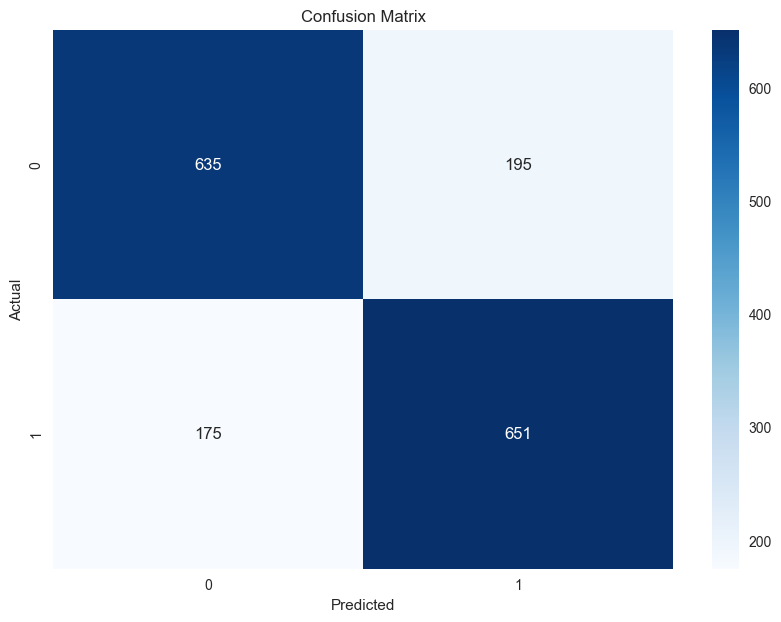

In [21]:
model_features = tuned_model.feature_name_
print("Các đặc trưng mô hình sử dụng:", model_features)
X_test_reduced = X_test[model_features]
y_pred = tuned_model.predict(X_test_reduced)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



**Nhận xét Confusion Matrix**

***1. Phân tích chi tiết***
- True Negatives (TN) = 635: Số khách hàng không churn được dự đoán chính xác.
- False Positives (FP) = 195: Số khách hàng dự đoán sai là churn khi thực tế không churn.
- False Negatives (FN) = 175: Số khách hàng dự đoán sai là không churn khi thực tế churn.
- True Positives (TP) = 651: Số khách hàng churn được dự đoán chính xác.

***2. Đánh giá hiệu suất***
- Độ chính xác (Accuracy) = (TN + TP) / (TN + FP + FN + TP) ≈ 77.66%
- Độ nhạy (Sensitivity/Recall) cho lớp churn = TP / (TP + FN) ≈ 78.82%
- Độ đặc hiệu (Specificity) cho lớp không churn = TN / (TN + FP) ≈ 76.51%
- Precision cho lớp churn = TP / (TP + FP) ≈ 76.95%

***3. Nhận xét***
- Mô hình có hiệu suất tương đối tốt với độ chính xác tổng thể khoảng 77.66%.
- Khả năng nhận diện khách hàng churn (độ nhạy) khá tốt, khoảng 78.82%.
- Mô hình cân bằng giữa việc dự đoán churn và không churn (độ nhạy và độ đặc hiệu gần nhau).
- Tỷ lệ false positives (195) và false negatives (175) khá cân bằng, không thiên vị quá nhiều về một lớp nào.




[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 2650, number of negative: 2646
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 5296, number of used features: 5
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics

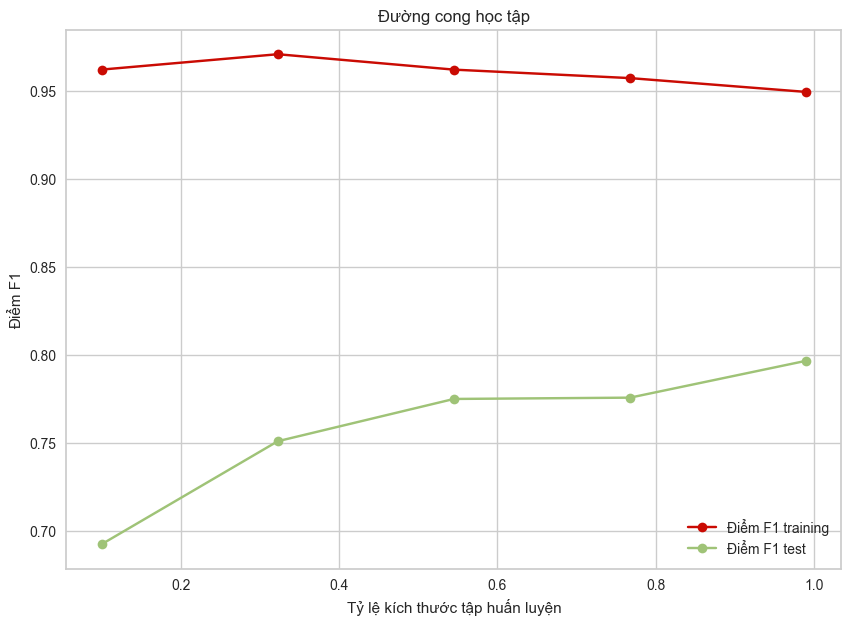

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Trích xuất mô hình đã được tinh chỉnh
final_model = finalize_model(tuned_model)

# Chuẩn bị dữ liệu
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa các kích thước tập train
train_sizes = np.linspace(0.1, 0.99, 5)  # Thay đổi từ 1.0 thành 0.99

# Khởi tạo danh sách để lưu điểm số
train_scores = []
test_scores = []

# Tính toán điểm số cho mỗi kích thước tập train
for size in train_sizes:
    # Lấy một phần của tập train
    if size < 1.0:
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, 
                                                                train_size=size, 
                                                                random_state=42)
    else:
        X_train_subset, y_train_subset = X_train, y_train
    
    # Huấn luyện mô hình
    final_model.fit(X_train_subset, y_train_subset)
    
    # Tính điểm F1 cho tập train
    y_train_pred = final_model.predict(X_train_subset)
    train_scores.append(f1_score(y_train_subset, y_train_pred))
    
    # Tính điểm F1 cho tập test
    y_test_pred = final_model.predict(X_test)
    test_scores.append(f1_score(y_test, y_test_pred))

# Vẽ đồ thị
plt.figure(figsize=(10,7))
plt.plot(train_sizes, train_scores, 'o-', color="r", label="Điểm F1 training")
plt.plot(train_sizes, test_scores, 'o-', color="g", label="Điểm F1 test")
plt.xlabel("Tỷ lệ kích thước tập huấn luyện")
plt.ylabel("Điểm F1")
plt.title("Đường cong học tập")
plt.legend(loc="best")
plt.grid(True)
plt.show()


**Nhận xét và đề xuất:**

- Overfitting vừa phải: Mô hình có dấu hiệu overfitting, nhưng không quá nghiêm trọng. Khoảng cách giữa hiệu suất trên tập huấn luyện và tập kiểm tra đã giảm khi tăng kích thước dữ liệu.

- Cải thiện với dữ liệu: Việc tăng kích thước tập huấn luyện đã cải thiện đáng kể hiệu suất trên tập kiểm tra, đặc biệt là trong khoảng 20-60% dữ liệu.

- Tiềm năng cải thiện: Đường cong trên tập kiểm tra vẫn có xu hướng tăng nhẹ ở cuối, cho thấy có thể cải thiện thêm nếu có thêm dữ liệu, mặc dù mức độ cải thiện có thể không lớn.

- Cân bằng bias-variance: Mô hình đã cải thiện được vấn đề variance so với ban đầu, nhưng vẫn còn khoảng trống để cải thiện.

- Hiệu suất tổng thể: Với điểm F1 trên tập kiểm tra đạt khoảng 0.80, mô hình đang hoạt động khá tốt, nhưng vẫn có thể cải thiện thêm.

Feature Importance:
             feature  importance
3  AvgMonthlyCharges        2162
1       TotalCharges        1623
4       ChargesRatio        1208
2      tenure_scaled        1094
0           Contract          39


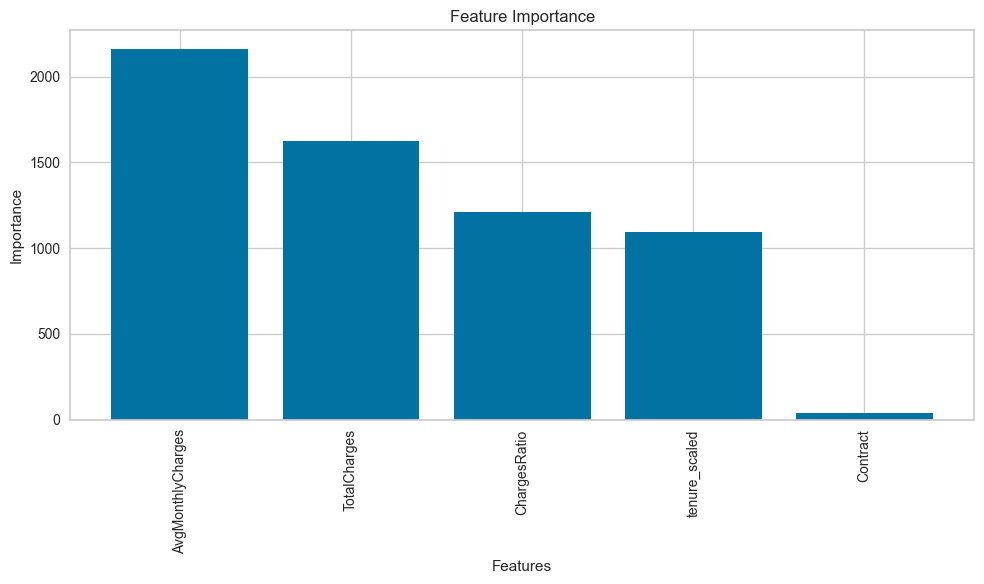

In [30]:
from pycaret.classification import plot_model, get_config

# Get the list of features
model_features = get_config('X').columns.tolist()
print("Features used by the model:", model_features)

# Plot feature importance
plot_model(tuned_model, plot='feature', save=True)

# Get feature importance values
feature_importance = pd.DataFrame({
    'feature': model_features,
    'importance': tuned_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plot feature importance using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Nhận xét**

***1. Đặc trưng quan trọng nhất:***

- AvgMonthlyCharges là yếu tố có ảnh hưởng lớn nhất đến việc dự đoán churn. Điều này cho thấy giá cả là yếu tố chính khiến khách hàng quyết định tiếp tục hoặc hủy dịch vụ.

***2. Đặc trưng quan trọng tiếp theo:***

- TotalCharges đứng thứ hai về tầm quan trọng, củng cố thêm vai trò của yếu tố tài chính trong quyết định của khách hàng.
- ChargesRatio: Có thể là tỷ lệ giữa các loại chi phí khác nhau, cũng đóng vai trò quan trọng trong việc dự đoán churn.
- tenure_scaled cho thấy thời gian khách hàng đã sử dụng dịch vụ cũng ảnh hưởng đáng kể đến khả năng họ tiếp tục duy trì dịch vụ.
 
***3. Đặc trưng ít quan trọng:***

- Contract có tầm quan trọng rất thấp trong mô hình này.

***4. Yếu tố tài chính:***

- Chi phí hàng tháng và tổng chi phí là những yếu tố quan trọng nhất trong việc dự đoán churn. Công ty nên tập trung vào chiến lược giá cả cạnh tranh và minh bạch để giữ chân khách hàng.

***5. Thời gian sử dụng dịch vụ quan trọng:***

- Khách hàng đã sử dụng dịch vụ lâu dài có xu hướng ít rời bỏ hơn. Cần có chương trình chăm sóc và ưu đãi đặc biệt cho khách hàng trung thành.


***6. Xem xét lại yếu tố hợp đồng:***

- Mặc dù loại hợp đồng có ảnh hưởng thấp trong mô hình này, công ty nên xem xét lại cách thiết kế và tiếp thị các loại hợp đồng khác nhau.

***5. Tính toán performance của model trên tập test.*** 

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Dự đoán trên tập test
y_pred = predict_model(tuned_model, data=X_test)['Label']
y_pred_proba = predict_model(tuned_model, data=X_test)['Score']

# Tính các metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# In kết quả
print("Performance trên tập test:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")




[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 